# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing
import matplotlib
from sklearn.tree import DecisionTreeRegressor
def normalize_col(col, doi, norm_val):
    data=((doi[col]-doi[col].min())/(doi[col].max()-doi[col].min()))*norm_val
    return data

def rmse (y_true, y_pred):
    return sqrt(np.mean((y_pred -y_true)**2))

def sqrt (x):
    return x**(1/2.0)

def krmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred -y_true), axis=-1))

data = pd.read_csv('2020shiftedByThreeWeeks.csv')
data = data.drop(columns=data.columns[0])
data.head()

y = normalize_col('Total Cases',data,1)
x = pd.DataFrame()
for col in data.columns:
    if col!='index' and col!='YEAR' and col!='WEEK' and col!='index.1':
        x1 = normalize_col(col,data,1)
        x = pd.concat([x,x1],axis=1)
        
xlength = x.shape[0]
x_train = x[:int(2*xlength/3)]
y_train = y[:int(2*xlength/3)]
x_test = x[int(2*xlength/3):]
y_test = y[int(2*xlength/3):]
xlength = x_train.shape[0]
x_val = x_train[:3*int(xlength/10)]
y_val = y_train[:3*int(xlength/10)]

# Decision Tree Regressor

How to choose best max_depth for DecisionTreeRegressor:
1. Choose a number of tree depths to start a for loop (try to cover whole area so try small ones and very big ones as well)
2. Inside a for loop divide your dataset to train/validation (e.g. 70%/30%)
3. Each time train your decision tree with that depth on training data and test it on the validation set, then keep the validation error (you can also keep the training error)
4. Plot the validation error (you can combine it with evolution of training error to have a prettier plot for understanding!)
5. Find the global minimum of validation error.
6. Then you can narrow your search in a new for loop according to the value you found to reach a more precise value

Source: https://datascience.stackexchange.com/questions/26776/how-to-calculate-ideal-decision-tree-depth-without-overfitting

In [39]:
err_dat = pd.DataFrame()
loop_it=30
for i in range(30):
    regr = DecisionTreeRegressor(max_depth=i+1)
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_val)
    err = rmse(y_val,y_pred)
    err_dat=err_dat.append([err])
err_dat=err_dat.reset_index()
err_dat=err_dat.drop(columns='index')
err_dat.min()

0    0.000202
dtype: float64

In [40]:
err_dat

,0
0,0.029487
1,0.014927
2,0.007707
3,0.004046
4,0.002048
5,0.000747
6,0.000372
7,0.000228
8,0.000202
9,0.000202


In [41]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth =17)
regr.fit(x_train,y_train)
y_pred = regr.predict(x_val)

0.9999792196725934x + 8.745380534378961e-06 = y


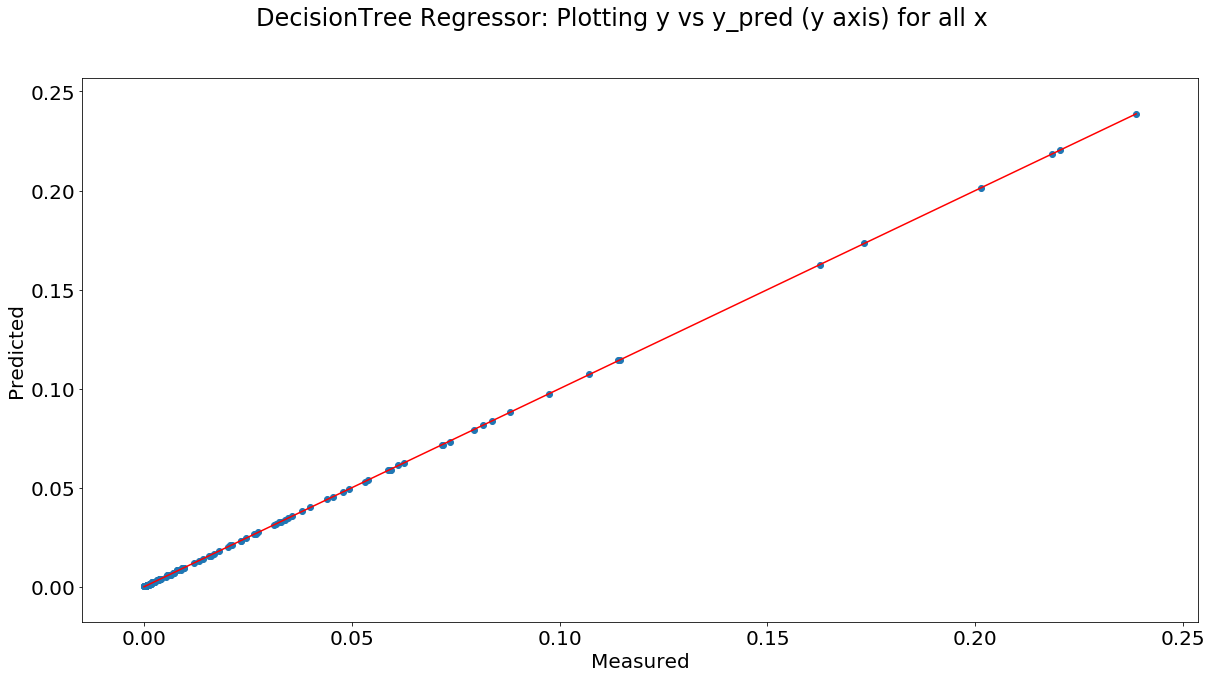

In [42]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.scatter(y_val,y_pred)
plt.suptitle('DecisionTree Regressor: Plotting y vs y_pred (y axis) for all x')
plt.plot(np.unique(y_val), np.poly1d(np.polyfit(y_val, y_pred, 1))(np.unique(y_val)),'red')
print(str(np.polyfit(y_val, y_pred, 1)[0])+'x + '+ str(np.polyfit(y_val, y_pred, 1)[1])+' = y')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

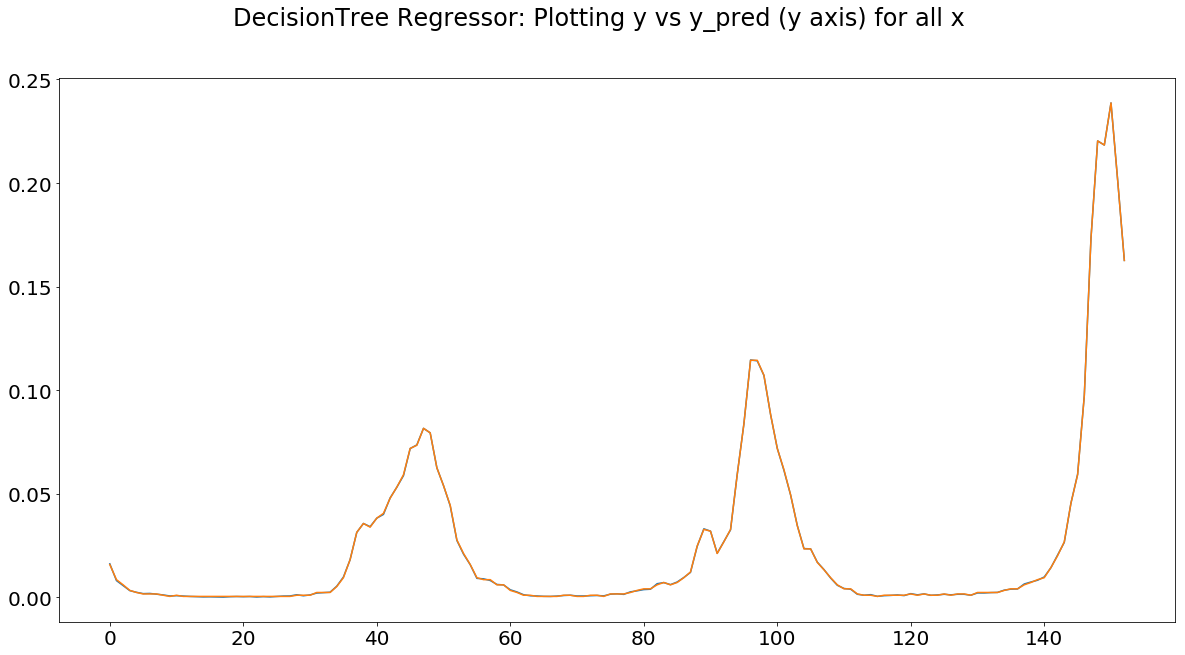

In [43]:
fig = plt.figure(figsize=(20,10))
plt.plot(np.arange(len(y_val)),y_val)
plt.plot(np.arange(len(y_val)),y_pred)
plt.suptitle('DecisionTree Regressor: Plotting y vs y_pred (y axis) for all x')
# fig.set_xlabel('Measured')
# fig.set_ylabel('Predicted')
plt.show()

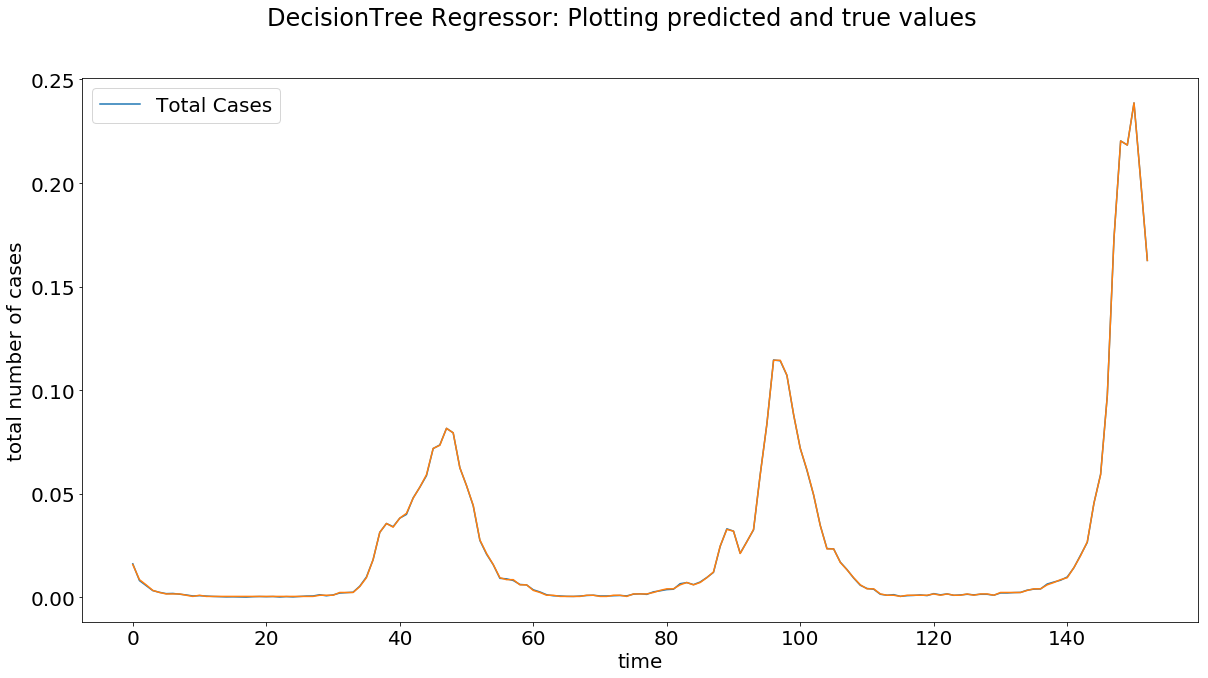

In [44]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.plot(np.arange(len(y_val)),y_val)
plt.plot(np.arange(len(y_val)),y_pred)
plt.suptitle('DecisionTree Regressor: Plotting predicted and true values')
plt.xlabel('time')
plt.ylabel('total number of cases')
plt.legend()
plt.show()

# Testing Decision Tree Regressor

In [45]:
y_pred = regr.predict(x_test)
data_train = data[:int(2*len(data)/3)]
data_test = data[int(2*len(data)/3):]
data_val = data_train[:3*int(len(data)/10)]
newytest = y_test.reset_index().drop(columns='index')
newdatatest = data_test.drop(columns='index').reset_index().drop(columns='index')
bot = newytest['Total Cases'][250]
top =newdatatest['Total Cases'][250]
scale = top/bot
final_test_vals = y_test*scale
final_pred_vals = y_pred*scale
x = final_test_vals
y = final_pred_vals

0.8228394211611012x + 290.7292067164191 = y
RMSE: 1330.4765321682387


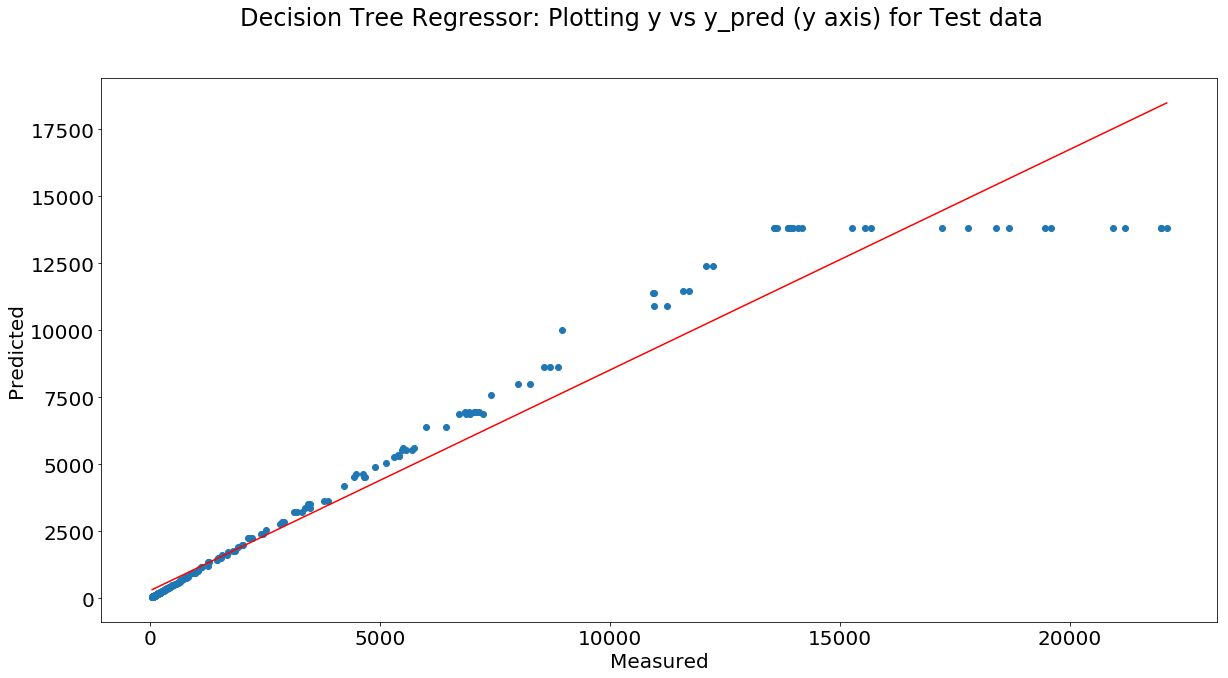

In [46]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.suptitle('Decision Tree Regressor: Plotting y vs y_pred (y axis) for Test data')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),'red')
print(str(np.polyfit(x, y, 1)[0])+'x + '+ str(np.polyfit(x, y, 1)[1])+' = y')
print("RMSE: " + str(rmse(x,y)))
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

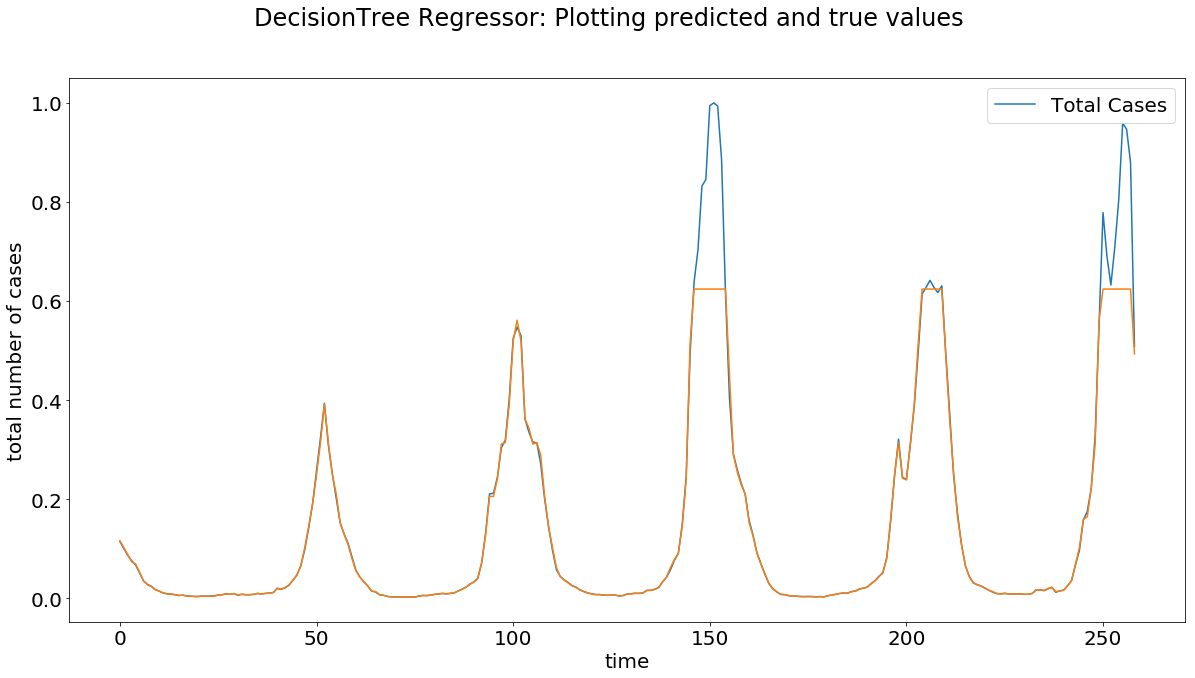

In [47]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.plot(np.arange(len(y_test)),y_test)
plt.plot(np.arange(len(y_test)),y_pred)
plt.suptitle('DecisionTree Regressor: Plotting predicted and true values')
plt.xlabel('time')
plt.ylabel('total number of cases')
plt.legend()
plt.show()

In [48]:
rmse(y_pred,y_test)

0.06018077312141481

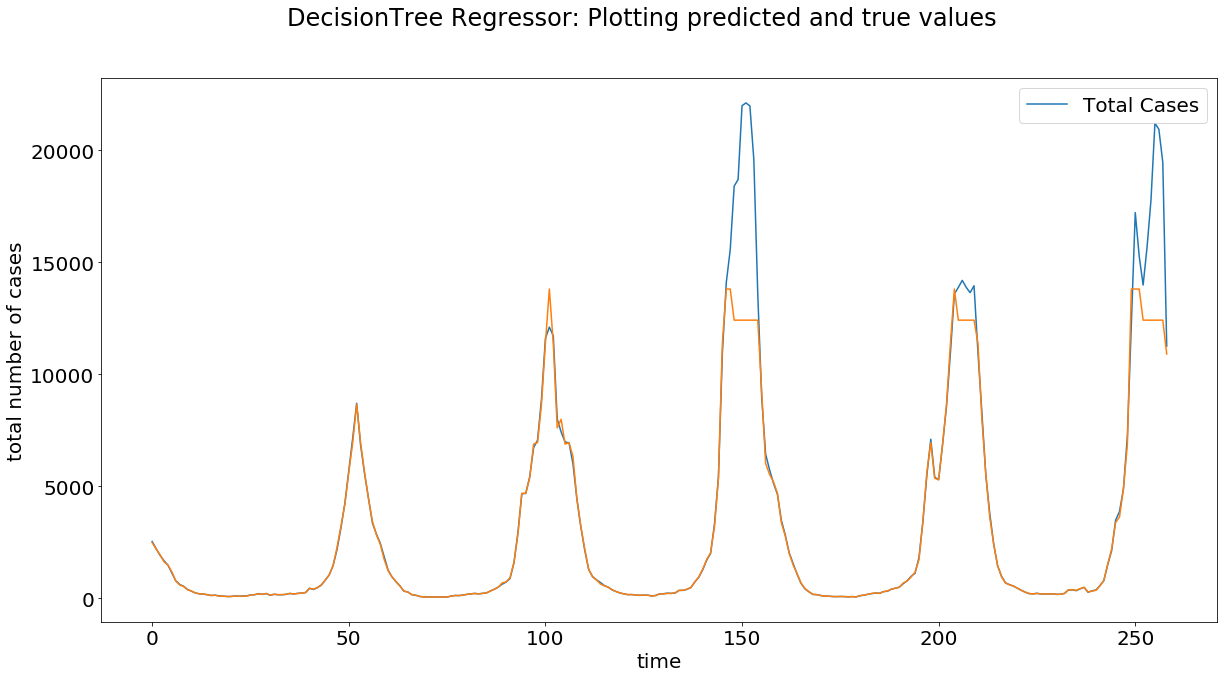

In [13]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.plot(np.arange(len(x)),x)
plt.plot(np.arange(len(x)),y)
plt.suptitle('DecisionTree Regressor: Plotting predicted and true values')
plt.xlabel('time')
plt.ylabel('total number of cases')
plt.legend()
plt.show()

In [14]:
rmse(x,y)

1623.672308018426

# Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
err_dat = pd.DataFrame()
loop_it=100
weight_err = 0.001
for i in range(loop_it):
    regr = RandomForestRegressor(max_depth=i+1)
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_val)
    err = rmse(y_val,y_pred) + weight_err*i
    err_dat=err_dat.append([err])
err_dat=err_dat.reset_index()
err_dat=err_dat.drop(columns='index')
minval = err_dat.min()
max_dep=err_dat[err_dat[0]==minval[0]]
max_dep=max_dep.reset_index()
max_dep=max_dep['index'][0]

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

In [19]:
regr = RandomForestRegressor(max_depth = max_dep)
print("Max depth: "+str(max_dep))
regr.fit(x_train,y_train)
y_pred = regr.predict(x_val)

Max depth: 4


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9947324881446832x + 0.0004241166921410429 = y


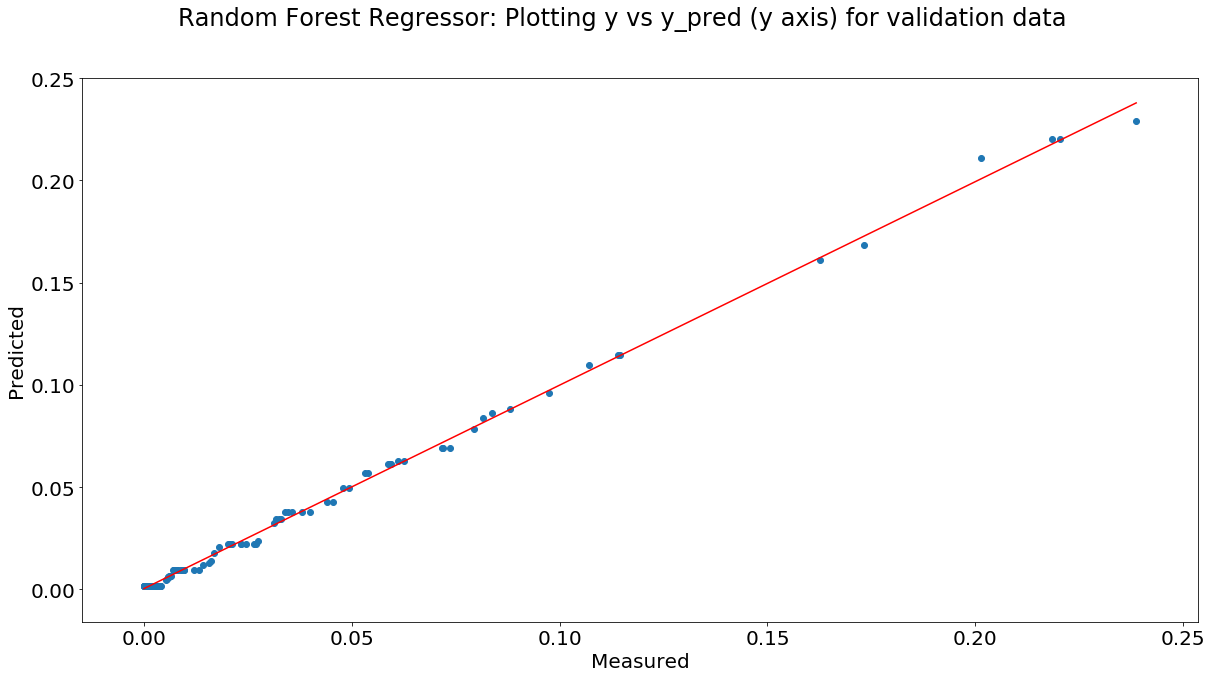

In [20]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.suptitle('Random Forest Regressor: Plotting y vs y_pred (y axis) for validation data')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),'red')
print(str(np.polyfit(x, y, 1)[0])+'x + '+ str(np.polyfit(x, y, 1)[1])+' = y')
print("RMSE: " + str(rmse(x,y)))
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

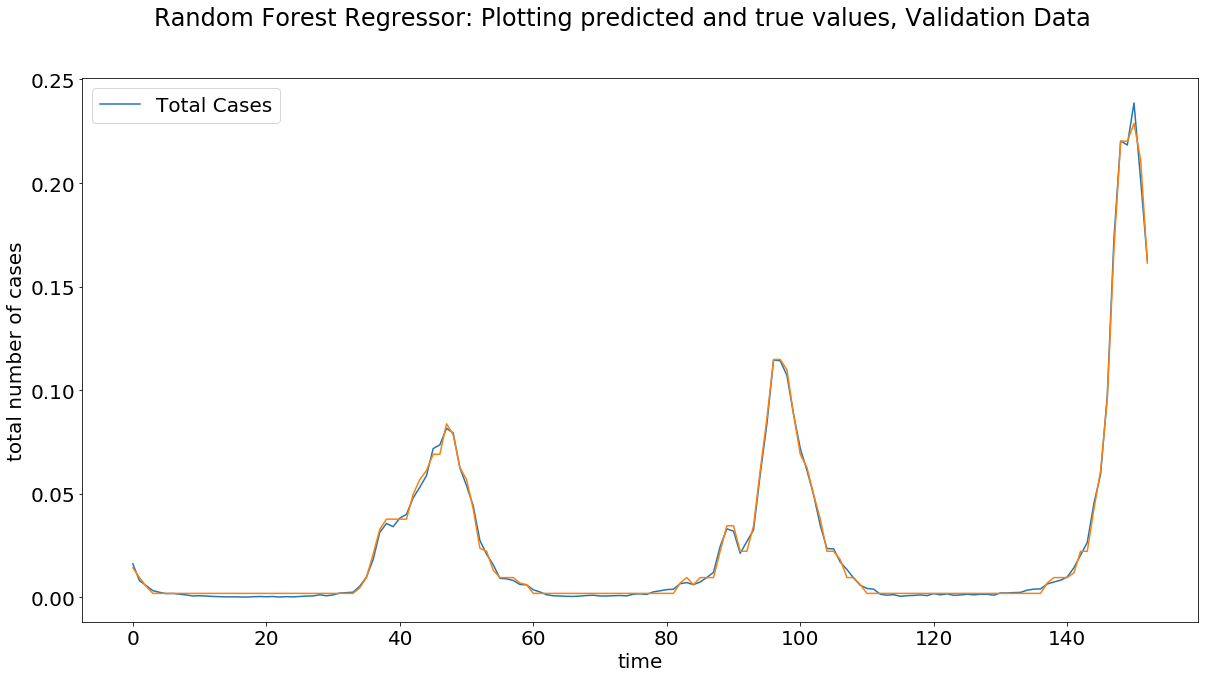

In [21]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.plot(np.arange(len(y_val)),y_val)
plt.plot(np.arange(len(y_val)),y_pred)
plt.legend()
plt.suptitle('Random Forest Regressor: Plotting predicted and true values, Validation Data')
plt.xlabel('time')
plt.ylabel('total number of cases')
plt.show()

# Testing RandomForestRegressor

In [34]:
y_pred = regr.predict(x_test)
final_test_vals = y_test*scale
final_pred_vals = y_pred*scale
x = final_test_vals
y = final_pred_vals

0.7773704491503616x + 341.5815076874693 = y
RMSE: 1568.4983853837218


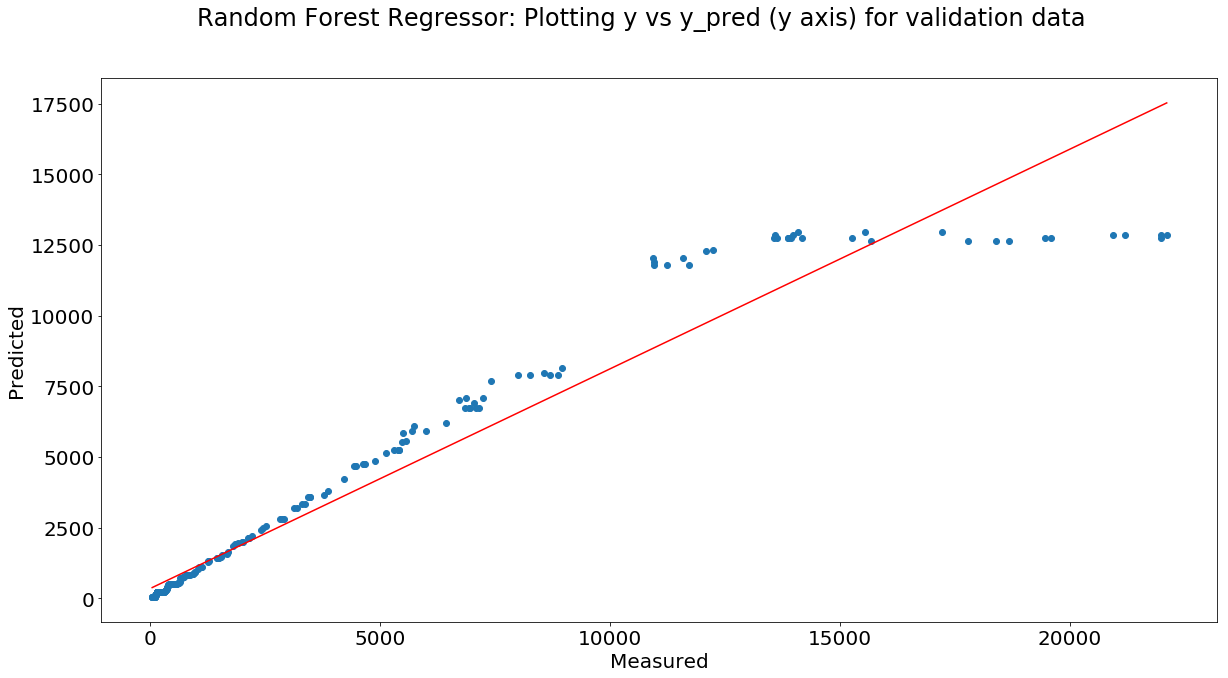

In [38]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.suptitle('Random Forest Regressor: Plotting y vs y_pred (y axis) for validation data')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),'red')
print(str(np.polyfit(x, y, 1)[0])+'x + '+ str(np.polyfit(x, y, 1)[1])+' = y')
print("RMSE: "+str(rmse(x,y)))
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

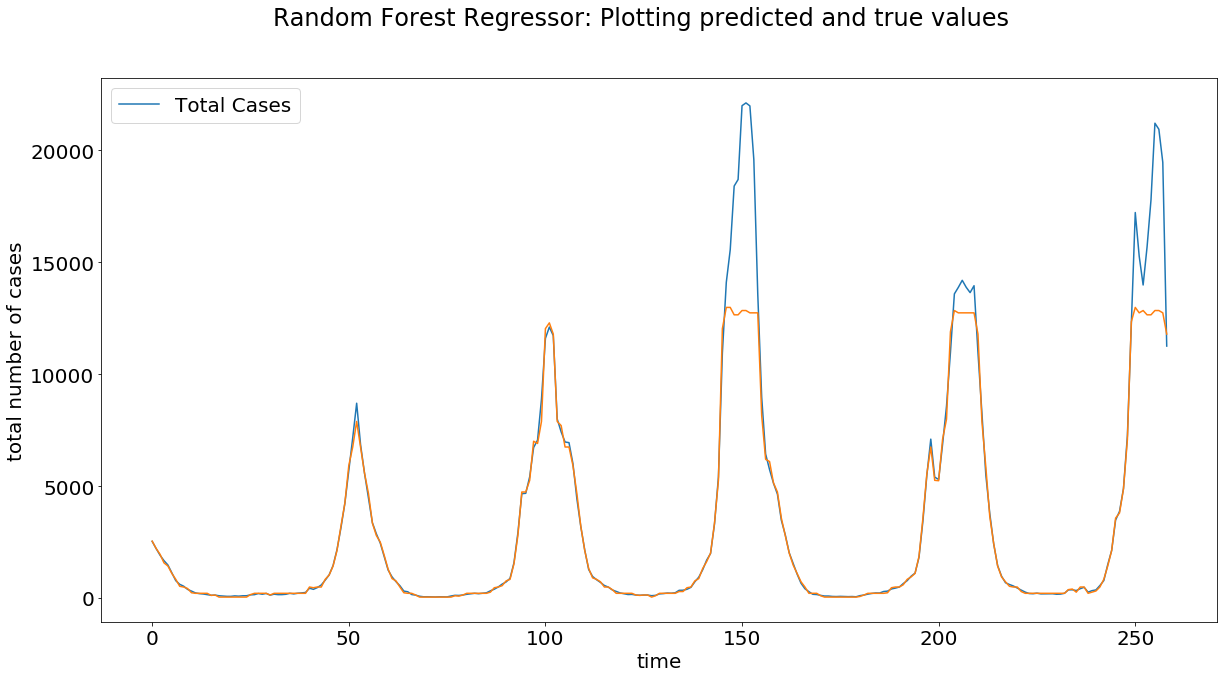

In [37]:
final_pred_vals = y_pred*scale
x = final_test_vals
y = final_pred_vals
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.plot(np.arange(len(x)),x)
plt.plot(np.arange(len(x)),y)
plt.legend()
plt.suptitle('Random Forest Regressor: Plotting predicted and true values')
plt.xlabel('time')
plt.ylabel('total number of cases')
plt.show()

In [27]:
rmse(x,y)

1568.4983853837218

# Neural Network

In [2]:
from keras import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
import keras.backend as K
from keras import models
from keras.layers import Conv1D
from keras.layers import Softmax
from keras.layers import Flatten

def krmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred -y_true), axis=-1))

input_dim = 26


Using TensorFlow backend.


In [6]:
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=10, input_dim=input_dim,kernel_initializer='normal',activation='tanh'))
    regressor.add(Dense(units=9, input_dim=10,kernel_initializer='normal',activation='elu'))
    regressor.add(Dense(units=1, input_dim=10,kernel_initializer='normal',activation='relu'))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy',krmse])
    return regressor

In [11]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=1000)

In [78]:
model = models.Sequential()
model.add(Dense(100, input_shape=(input_dim,)))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(100))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='sgd')

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
results = model.fit(x_train,y_train,epochs=120)
y_pred= model.predict(x_val)

Instructions for updating:
Use tf.cast instead.
Epoch 1/120


In [1]:
fig, ax = plt.subplots()
ax.scatter(y_val, y_pred)
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
print("*this is validation data")
print("RMSE: ")
print(rmse(np.array([y_val]),y_pred.reshape(1,-1)))
plt.suptitle("Neural Network Predicting Number of Influenza Cases 3 Weeks in Advance")
plt.show()

NameError: name 'plt' is not defined

# Neural Network 2

In [3]:
alp = 0.03
model = models.Sequential()
model.add(Dense(100, input_shape=(input_dim,)))
model.add(LeakyReLU(alpha=alp))
model.add(Dense(100))
model.add(LeakyReLU(alpha=alp))
model.add(Dense(100))
model.add(LeakyReLU(alpha=alp))
model.add(Dense(100))
model.add(LeakyReLU(alpha=alp))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='sgd')

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
# results = model.fit(x_train,y_train,epochs=200)
# y_pred= model.predict(x_val)

In [7]:
# fig, ax = plt.subplots()
fig = plt.figure(figsize=(20,10))
plt.scatter(y_val, y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
print("*this is validation data")
print("RMSE: ")
print("Using RELU Activation Function")
print(rmse(np.array([y_val]),y_pred.reshape(1,-1)))
plt.suptitle("Neural Network Predicting Number of Influenza Cases 3 Weeks in Advance")
plt.show()

NameError: name 'y_pred' is not defined

<Figure size 1440x720 with 0 Axes>

In [16]:
rmse_dat=rmse_dat.reset_index()

NameError: name 'rmse_dat' is not defined

In [17]:
rmse_dat=rmse_dat.drop(columns=['level_0','index'])

NameError: name 'rmse_dat' is not defined

In [18]:
minval = rmse_dat.min()
epoch_num=rmse_dat[rmse_dat[0]==minval[0]]

NameError: name 'rmse_dat' is not defined

In [19]:
epoch_num=epoch_num.reset_index()
epoch_number=epoch_num['index'][0]+1

NameError: name 'epoch_num' is not defined

In [5]:
results = model.fit(x_train,y_train,epochs=1000)
y_pred= model.predict(x_val)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
518/518 [==============================] - 1s 1ms/step - loss: 0.0129
Epoch 2/1000
518/518 [==============================] - 0s 128us/step - loss: 0.0101
Epoch 3/1000
518/518 [==============================] - 0s 143us/step - loss: 0.0093
Epoch 4/1000
518/518 [==============================] - 0s 133us/step - loss: 0.0090
Epoch 5/1000
518/518 [==============================] - 0s 117us/step - loss: 0.0088 0s - loss: 0.008
Epoch 6/1000
518/518 [==============================] - 0s 123us/step - loss: 0.0086
Epoch 7/1000
518/518 [==============================] - 0s 120us/step - loss: 0.0084
Epoch 8/1000
518/518 [==============================] - 0s 121us/step - loss: 0.0082
Epoch 9/1000
518/518 [==============================] - 0s 458us/step - loss: 0.0081
Epoch 10/1000
518/518 [==============================] - 0s 117us/step - loss: 0.0079
Epoch 11/1000
518/518 [==============================] - 0s 120us/step - loss: 0.0078


518/518 [==============================] - 0s 116us/step - loss: 0.0015
Epoch 188/1000
518/518 [==============================] - 0s 116us/step - loss: 0.0015
Epoch 189/1000
518/518 [==============================] - 0s 116us/step - loss: 0.0014
Epoch 190/1000
518/518 [==============================] - 0s 113us/step - loss: 0.0014
Epoch 191/1000
518/518 [==============================] - 0s 117us/step - loss: 0.0014
Epoch 192/1000
518/518 [==============================] - 0s 116us/step - loss: 0.0014
Epoch 193/1000
518/518 [==============================] - 0s 126us/step - loss: 0.0014
Epoch 194/1000
518/518 [==============================] - 0s 114us/step - loss: 0.0014
Epoch 195/1000
518/518 [==============================] - 0s 114us/step - loss: 0.0014
Epoch 196/1000
518/518 [==============================] - 0s 108us/step - loss: 0.0014
Epoch 197/1000
518/518 [==============================] - 0s 115us/step - loss: 0.0014
Epoch 198/1000
518/518 [==============================] - 

518/518 [==============================] - 0s 117us/step - loss: 3.4187e-04
Epoch 370/1000
518/518 [==============================] - 0s 123us/step - loss: 3.3880e-04
Epoch 371/1000
518/518 [==============================] - 0s 114us/step - loss: 3.3574e-04
Epoch 372/1000
518/518 [==============================] - 0s 116us/step - loss: 3.3368e-04
Epoch 373/1000
518/518 [==============================] - 0s 115us/step - loss: 3.3126e-04
Epoch 374/1000
518/518 [==============================] - 0s 116us/step - loss: 3.2911e-04
Epoch 375/1000
518/518 [==============================] - 0s 114us/step - loss: 3.2608e-04
Epoch 376/1000
518/518 [==============================] - 0s 109us/step - loss: 3.2435e-04
Epoch 377/1000
518/518 [==============================] - 0s 109us/step - loss: 3.2221e-04
Epoch 378/1000
518/518 [==============================] - 0s 114us/step - loss: 3.2004e-04
Epoch 379/1000
518/518 [==============================] - 0s 108us/step - loss: 3.1786e-04
Epoch 380/1000

518/518 [==============================] - 0s 130us/step - loss: 1.0755e-04
Epoch 550/1000
518/518 [==============================] - 0s 125us/step - loss: 1.0650e-04
Epoch 551/1000
518/518 [==============================] - 0s 126us/step - loss: 1.0618e-04
Epoch 552/1000
518/518 [==============================] - 0s 126us/step - loss: 1.0622e-04
Epoch 553/1000
518/518 [==============================] - 0s 134us/step - loss: 1.0528e-04
Epoch 554/1000
518/518 [==============================] - 0s 131us/step - loss: 1.0467e-04
Epoch 555/1000
518/518 [==============================] - 0s 125us/step - loss: 1.0488e-04
Epoch 556/1000
518/518 [==============================] - 0s 127us/step - loss: 1.0373e-04
Epoch 557/1000
518/518 [==============================] - 0s 134us/step - loss: 1.0320e-04
Epoch 558/1000
518/518 [==============================] - 0s 468us/step - loss: 1.0255e-04
Epoch 559/1000
518/518 [==============================] - 0s 129us/step - loss: 1.0230e-04
Epoch 560/1000

518/518 [==============================] - 0s 125us/step - loss: 5.4164e-05
Epoch 730/1000
518/518 [==============================] - 0s 125us/step - loss: 5.4018e-05
Epoch 731/1000
518/518 [==============================] - 0s 132us/step - loss: 5.3971e-05
Epoch 732/1000
518/518 [==============================] - 0s 127us/step - loss: 5.3692e-05
Epoch 733/1000
518/518 [==============================] - 0s 124us/step - loss: 5.3761e-05
Epoch 734/1000
518/518 [==============================] - 0s 122us/step - loss: 5.3553e-05
Epoch 735/1000
518/518 [==============================] - 0s 126us/step - loss: 5.3251e-05
Epoch 736/1000
518/518 [==============================] - 0s 120us/step - loss: 5.3328e-05
Epoch 737/1000
518/518 [==============================] - 0s 120us/step - loss: 5.3200e-05
Epoch 738/1000
518/518 [==============================] - 0s 122us/step - loss: 5.2914e-05
Epoch 739/1000
518/518 [==============================] - 0s 125us/step - loss: 5.2701e-05
Epoch 740/1000

518/518 [==============================] - 0s 134us/step - loss: 3.7614e-05
Epoch 910/1000
518/518 [==============================] - 0s 121us/step - loss: 3.7883e-05
Epoch 911/1000
518/518 [==============================] - 0s 136us/step - loss: 3.7512e-05
Epoch 912/1000
518/518 [==============================] - 0s 483us/step - loss: 3.7309e-05
Epoch 913/1000
518/518 [==============================] - 0s 135us/step - loss: 3.7535e-05
Epoch 914/1000
518/518 [==============================] - 0s 126us/step - loss: 3.7333e-05
Epoch 915/1000
518/518 [==============================] - 0s 127us/step - loss: 3.7344e-05
Epoch 916/1000
518/518 [==============================] - 0s 125us/step - loss: 3.7159e-05
Epoch 917/1000
518/518 [==============================] - 0s 116us/step - loss: 3.6919e-05
Epoch 918/1000
518/518 [==============================] - 0s 117us/step - loss: 3.6978e-05
Epoch 919/1000
518/518 [==============================] - 0s 128us/step - loss: 3.6897e-05
Epoch 920/1000

*this is validation data, epochs=1000
RMSE: 0.0064735993208658435
Using RELU Activation Function


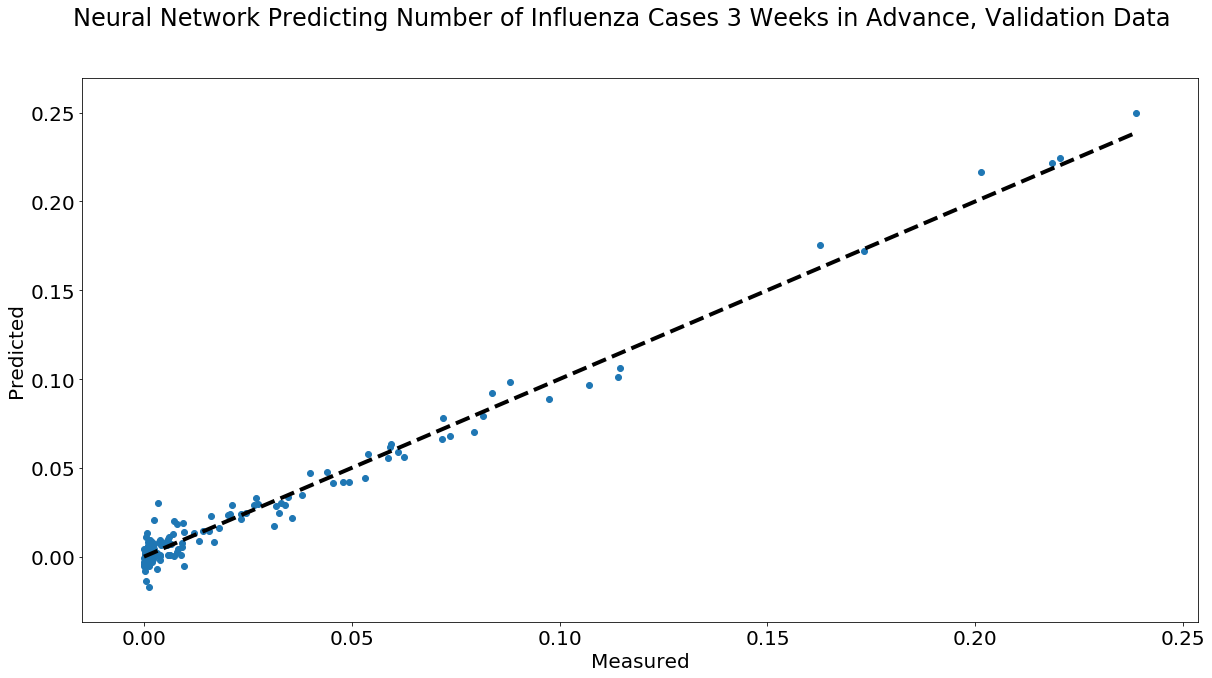

In [10]:
fig = plt.figure(figsize=(20,10))
matplotlib.rcParams.update({'font.size': 20})
plt.scatter(y_val, y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
print("*this is validation data, epochs="+str(1000))
print("RMSE: "+str(rmse(np.array([y_val]),y_pred.reshape(1,-1))))
print("Using RELU Activation Function")
plt.suptitle("Neural Network Predicting Number of Influenza Cases 3 Weeks in Advance, Validation Data")
plt.show()

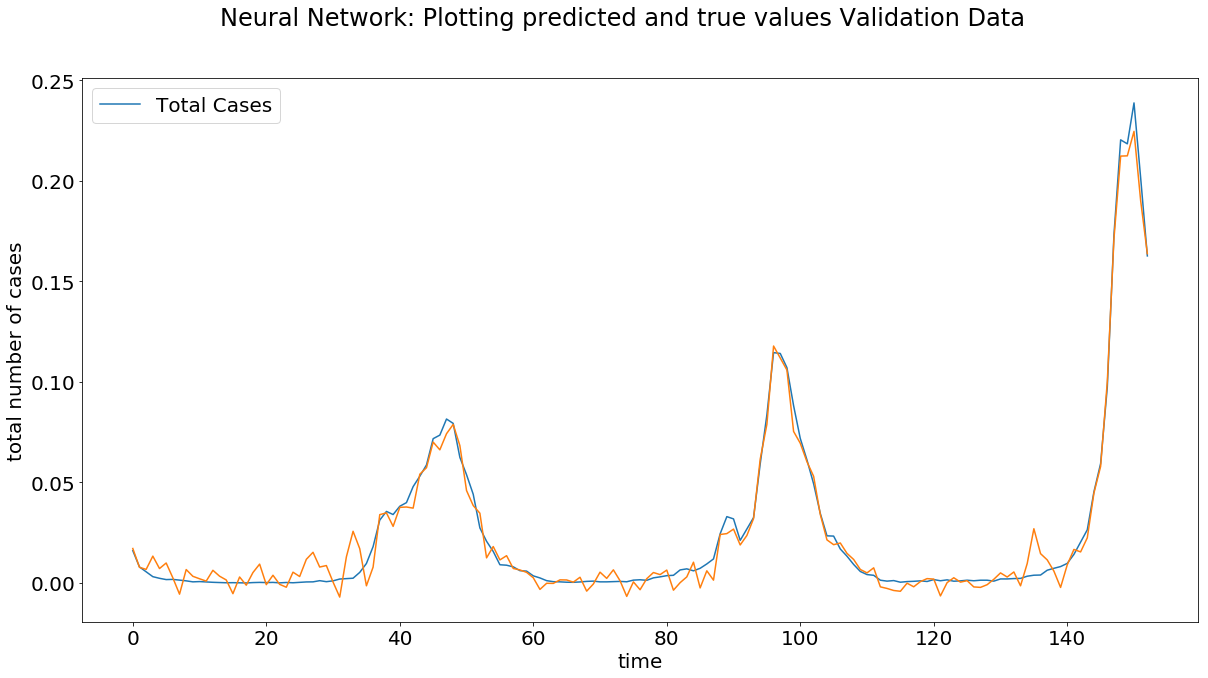

In [6]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.plot(np.arange(len(y_val)),y_val)
plt.plot(np.arange(len(y_val)),y_pred)
plt.legend()
plt.suptitle('Neural Network: Plotting predicted and true values Validation Data')
plt.xlabel('time')
plt.ylabel('total number of cases')
plt.show()

# Testing Neural Network

In [22]:
# results = model.fit(x_train,y_train,epochs=1000)
y_pred= model.predict(x_test)

*this is validation data, epochs=1000
RMSE: 0.035822264935610304


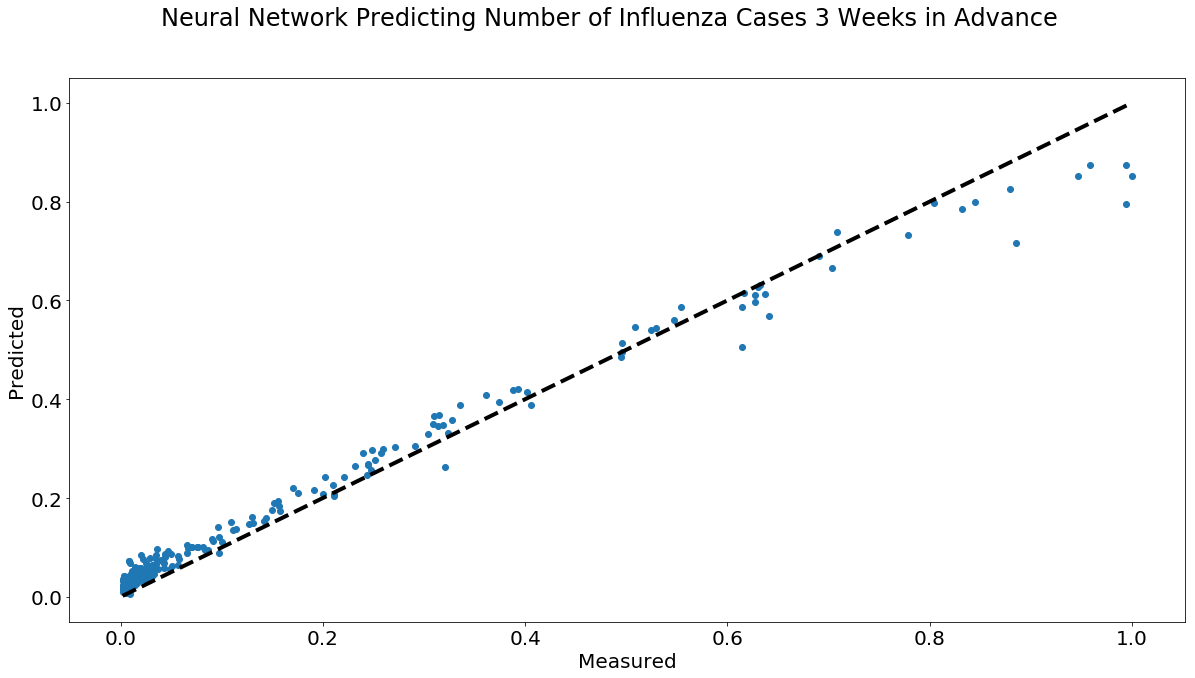

In [13]:
fig = plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
print("*this is validation data, epochs="+str(1000))
print("RMSE: "+str(rmse(np.array([y_test]),y_pred.reshape(1,-1))))
# print(rmse(np.array([y_test]),y_pred.reshape(1,-1)))
plt.suptitle("Neural Network Predicting Number of Influenza Cases 3 Weeks in Advance")
plt.show()

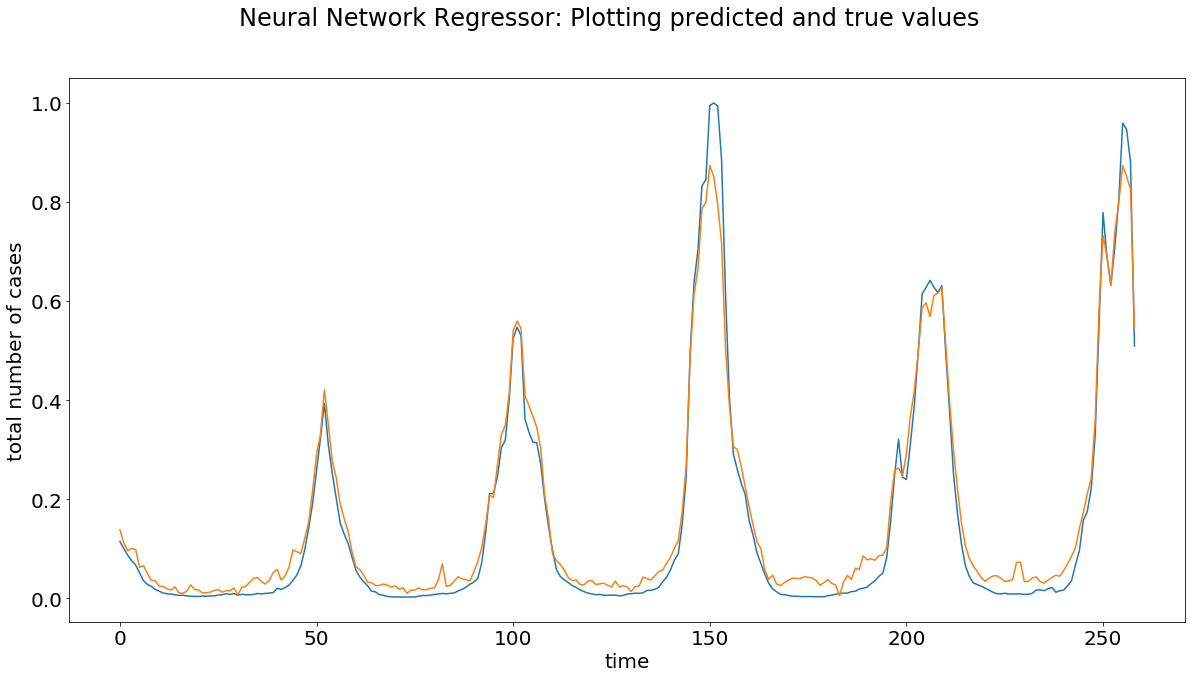

In [14]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.plot(np.arange(len(y_test)),y_test)
plt.plot(np.arange(len(y_test)),y_pred)
# plt.legend()
plt.suptitle('Neural Network Regressor: Plotting predicted and true values')
plt.xlabel('time')
plt.ylabel('total number of cases')
plt.show()

# Getting Time Frames

In [3]:
data_train = data[:int(2*len(data)/3)]
data_test = data[int(2*len(data)/3):]
data_val = data_train[:3*int(len(data)/10)]
newytest = y_test.reset_index().drop(columns='index')
newdatatest = data_test.drop(columns='index').reset_index().drop(columns='index')
bot = newytest['Total Cases'][250]
top =newdatatest['Total Cases'][250]
scale = top/bot
final_test_vals = y_test*scale
final_pred_vals = y_pred*scale
x = final_test_vals
y = final_pred_vals

NameError: name 'y_pred' is not defined

RMSE: 791.9586245786533


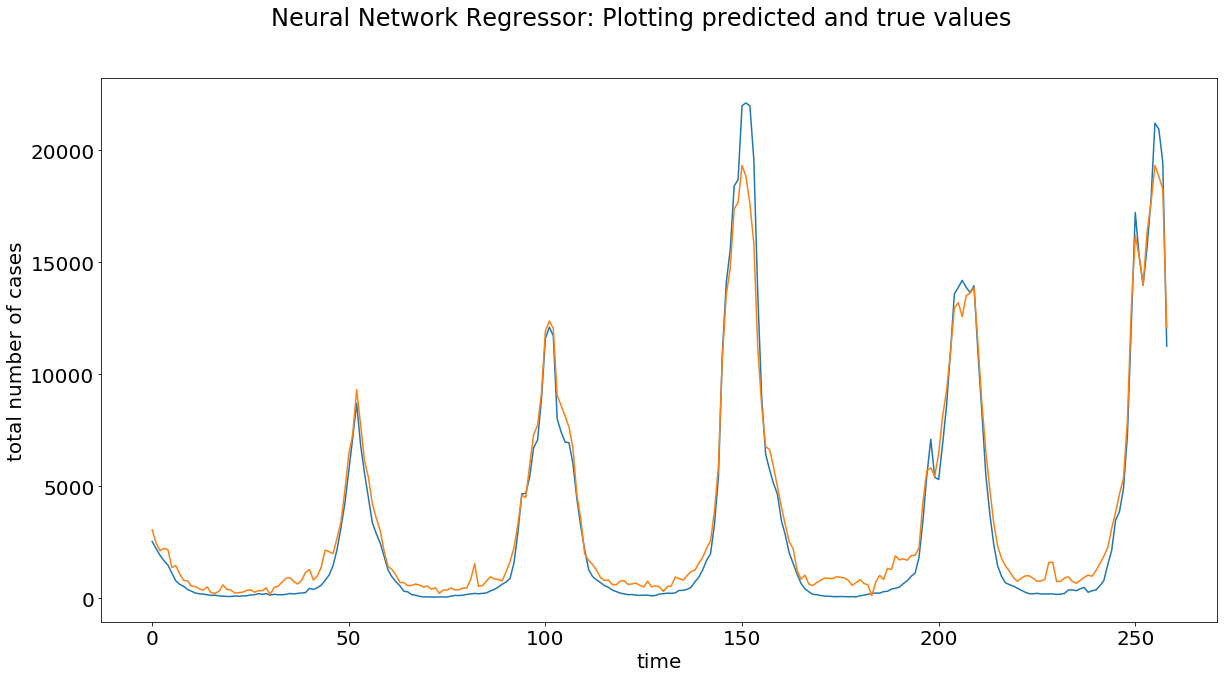

In [21]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
plt.plot(np.arange(len(y_test)),final_test_vals)
plt.plot(np.arange(len(y_test)),final_pred_vals)
vrmse = rmse(np.array([final_test_vals]),final_pred_vals.reshape(1,-1))
den = final_test_vals.mean()
print("RMSE: "+str(vrmse))
plt.suptitle('Neural Network Regressor: Plotting predicted and true values')
plt.xlabel('time')
plt.ylabel('total number of cases')
plt.show()

In [22]:
maxz = final_test_vals.max()

In [23]:
100*vrmse/maxz

3.5822264545804834

In [1]:
fig = plt.figure(figsize=(20,10))
plt.scatter(x, y)
plt.plot([x.min(), x.max()], [x.min(), x.max()], 'k--', lw=4)
print("got here")
poly = np.poly1d(np.polyfit(x, y, 1))
# plt.plot(x, poly*np.unique(x),'red')
print(str(poly[0])+'x + '+ str(poly[1])+' = y')
plt.xlabel('Measured')
plt.ylabel('Predicted')
print("*this is validation data, epochs="+str(1000))
print("RMSE: "+str(vrmse))
# print(rmse(np.array([y_test]),y_pred.reshape(1,-1)))
# print("RMSE/maximum value: "+str(100*vrmse/maxz))
plt.suptitle("Neural Network Predicting Number of Influenza Cases 3 Weeks in Advance")
plt.show()

NameError: name 'plt' is not defined

In [18]:
x.shape

(259,)

In [19]:
y.shape

(153, 1)

In [4]:
data_test

,index,YEAR,WEEK,Total Cases,index.1,influenza st,Influenza dis,Common Cold dis,flu st,flu symptoms st,...,Nasal Congestion syndrome,Cough topic,Cold medicine topic,Antibiotics drugtype,Antimicrobial resistance topic,Ibuprofen med,immunity st,Immunity topic,Swine influenza topic,flu medicine st
518,521,2015.0,10.0,2527.0,518,5.333333,10.714286,130.0,2.428571,4.000000,...,144.105263,151.923077,124.235294,124.160000,42.857143,145.306122,83.181818,74.942857,0.530612,16.153846
519,522,2015.0,11.0,2209.0,519,5.142857,9.285714,114.0,2.142857,3.454545,...,134.368421,141.794872,114.529412,120.320000,27.000000,148.938776,90.000000,74.942857,0.448980,15.230769
520,523,2015.0,12.0,1910.0,520,5.142857,9.285714,108.0,2.142857,3.272727,...,140.210526,137.743590,106.764706,119.040000,18.000000,145.306122,91.363636,75.814286,0.408163,13.384615
521,524,2015.0,13.0,1668.0,521,5.785714,8.441558,99.9,1.813187,3.000000,...,140.210526,146.726867,112.383901,115.589565,15.631579,159.014247,81.912226,75.814286,0.255102,9.862348
522,525,2015.0,14.0,1474.0,522,5.785714,7.597403,91.8,1.648352,2.454545,...,142.906883,140.738016,106.764706,115.589565,13.263158,150.789372,78.761755,75.814286,0.173469,9.862348
523,526,2015.0,15.0,1127.0,523,5.464286,6.753247,94.5,1.483516,2.454545,...,134.817814,137.743590,103.955108,113.864348,14.210526,148.047747,91.363636,93.188393,0.122449,7.748988
524,527,2015.0,16.0,773.0,524,5.142857,6.753247,86.4,1.318681,2.181818,...,140.210526,134.749164,98.335913,119.040000,18.000000,153.530997,81.912226,75.814286,0.091837,9.157895
525,528,2015.0,17.0,610.0,525,5.785714,6.753247,86.4,1.483516,2.181818,...,129.425101,137.743590,87.097523,113.864348,17.526316,148.047747,91.363636,78.973214,0.071429,9.157895
526,529,2015.0,18.0,527.0,526,5.464286,5.909091,78.3,1.648352,2.181818,...,115.943320,131.754738,89.907121,115.589565,16.578947,150.789372,100.815047,85.291071,0.061224,5.635628
527,530,2015.0,19.0,384.0,527,4.500000,5.064935,75.6,1.483516,1.909091,...,118.639676,125.765886,87.097523,119.040000,15.631579,150.789372,94.514107,83.711607,0.081633,7.748988
